ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [2]:
%run ../talktools.py

## Anomaly/Novelty/Outlier Detection

Sometimes we want to find outliers in our data -- either as candidates for cleaning or because novelties are what we are most interested in.  What would you do to find novelties? One possibility is to fit the data (potentially with "leave one out") you have with some parametric function and inspect those data that are farthest from your fit. You could assign a novelty score based on distance to the fit values.


We can also look to some ML techniques to create a non-parametric model of anomalies, potentially  There's not a lot of machinery for this in `sklearn` but there is some.

We'll look at *Isolation Forests* here as one technique. This requires, of course, that you've got a featurized dataset.

See http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html#sphx-glr-auto-examples-covariance-plot-outlier-detection-py

see also C. C. Aggarwal and S. Sathe, “Theoretical foundations and algorithms for outlier ensembles.” ACM SIGKDD Explorations Newsletter, vol. 17, no. 1, pp. 24–47, 2015

<img src="http://image.slidesharecdn.com/gerster-papisconnect-anomaly-150521055051-lva1-app6891/95/anomaly-detection-with-bigml-4-638.jpg?cb=1432187570">
<img src="https://www.evernote.com/l/AUUwXmpu3nVNOpxwEo67YZD8VZwI950BtuMB/image.png">
Source: http://www.slideshare.net/DavidGerster1/anomaly-detection-with-bigml

In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
import numpy as np

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

In [5]:
clf = IsolationForest(bootstrap=True, random_state=42, max_features=1.0)
clf.fit(X)

/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=True, contamination='legacy',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [6]:
scores = clf.decision_function(X)
most_wierd = np.argsort(scores)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

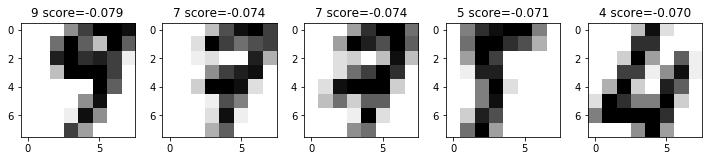

In [8]:
fig, axs = plt.subplots(1,5,figsize=(10,6))
for i,ind in enumerate(most_wierd[:5]):
    axs[i].imshow(X[ind].reshape(8,8),interpolation="nearest",cmap=plt.cm.gray_r)
    axs[i].set_title("{0:n} score={1:0.3f}".format(y[ind],scores[ind]))

plt.tight_layout()

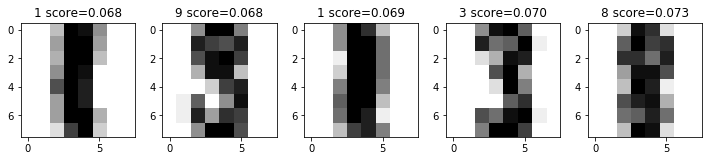

In [9]:
fig, axs = plt.subplots(1,5,figsize=(10,6))
for i,ind in enumerate(most_wierd[-5:]):
    axs[i].imshow(X[ind].reshape(8,8),interpolation="nearest",cmap=plt.cm.gray_r)
    axs[i].set_title("{0:n} score={1:0.3f}".format(y[ind],scores[ind]))

plt.tight_layout()

In [ ]:
from IPython.display import IFrame
IFrame('http://www.bigmacc.info', width="100%", height=600)

See https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_anomaly_comparison_001.png">

## Outlier for Time series

<img src="https://github.com/twitter/AnomalyDetection/raw/master/figs/Fig1.png">

There are functional-form modelling approaches to this.

For example, from Twitter's AnomalyDetection algorithm (in R): "The underlying algorithm – referred to as Seasonal Hybrid ESD (S-H-ESD) builds upon the Generalized [Extreme Studentized deviate (ESD)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm) test for detecting anomalies. Note that S-H-ESD can be used to detect both global as well as local anomalies. This is achieved by employing time series decomposition and using robust statistical metrics, viz., median together with ESD. "

https://blog.twitter.com/engineering/en_us/a/2015/introducing-practical-and-robust-anomaly-detection-in-a-time-series.html

People have implemented this in Python, thankfully.

In [ ]:
#!pip install git+https://github.com/Marcnuth/AnomalyDetection

In [10]:
import pandas as pd

def dparserfunc(date):
        return pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    
df = pd.read_csv("https://github.com/Marcnuth/AnomalyDetection"
                            "/raw/master/resources/data/test_detect_anoms.csv",
                            index_col='timestamp',
                            parse_dates=True, squeeze=True,
                            date_parser=dparserfunc)

In [11]:
df

timestamp
1980-09-25 14:01:00    182.478
1980-09-25 14:02:00    176.231
1980-09-25 14:03:00    183.917
1980-09-25 14:04:00    177.798
1980-09-25 14:05:00    165.469
1980-09-25 14:06:00    181.878
1980-09-25 14:07:00    184.502
1980-09-25 14:08:00    183.303
1980-09-25 14:09:00    177.578
1980-09-25 14:10:00    171.641
1980-09-25 14:11:00    191.014
1980-09-25 14:12:00    184.068
1980-09-25 14:13:00    188.457
1980-09-25 14:14:00    175.739
1980-09-25 14:15:00    175.524
1980-09-25 14:16:00    189.128
1980-09-25 14:17:00    176.885
1980-09-25 14:18:00    167.140
1980-09-25 14:19:00    173.723
1980-09-25 14:20:00    168.460
1980-09-25 14:21:00    177.623
1980-09-25 14:22:00    183.888
1980-09-25 14:23:00    167.487
1980-09-25 14:24:00    165.572
1980-09-25 14:25:00    170.480
1980-09-25 14:26:00    172.474
1980-09-25 14:27:00    166.448
1980-09-25 14:28:00    163.098
1980-09-25 14:29:00    163.544
1980-09-25 14:30:00    163.816
                        ...   
1980-10-05 13:29:00    143.79

In [12]:
import anomaly_detection
import numpy as np
result = anomaly_detection.anomaly_detect_ts(df, max_anoms=0.02, direction="both", plot=False)

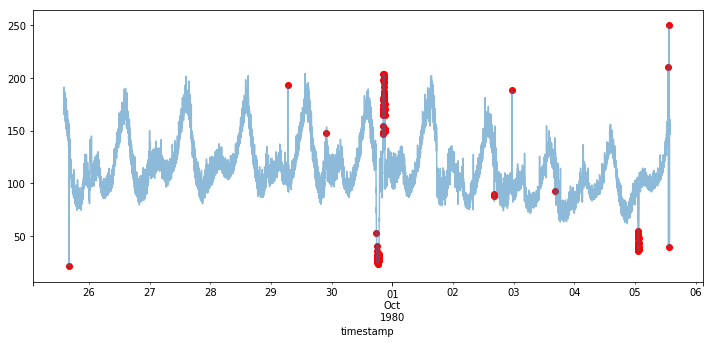

In [13]:
ax = df.plot(figsize=(12,5),alpha=0.5)
t = result["anoms"].index
v = result["anoms"].values
ax.scatter(t,v,c="r")

### Holt Winters & Exponential Smoothing

> Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data. - [Wikipedia](https://en.wikipedia.org/wiki/Exponential_smoothing)

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/eq.png">

From: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [ ]:
#!conda update statsmodels -y

In [14]:
import statsmodels
statsmodels.__version__

'0.9.0'

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [16]:
# this will take awhile...like 5 min+
fit1 = ExponentialSmoothing(np.asarray(df.values), seasonal_periods=10, trend='add', seasonal='add',).fit()

In [17]:
fit1.fittedvalues

array([186.24412683, 178.58272558, 175.9224434 , ..., 153.75612241,
       151.20429683, 149.98245412])

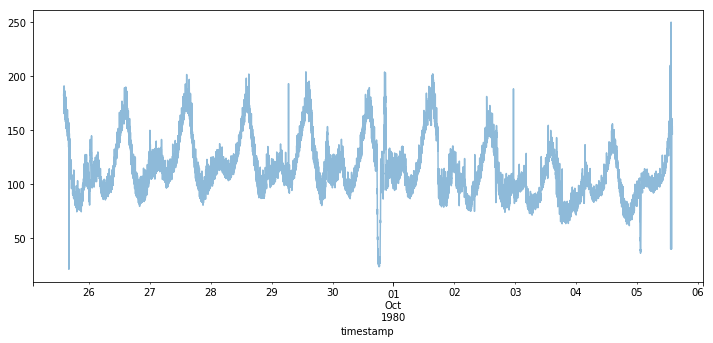

In [18]:
ax = df.plot(figsize=(12,5),alpha=0.5)
#ax.plot(df.index, fit1.fittedvalues)

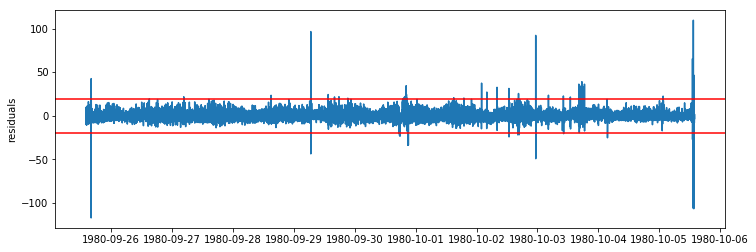

In [19]:
def MAD(x):
    """ median absolute deviation """
    return np.median(np.abs(x))
    
md = MAD(df.values - fit1.fittedvalues)
deviation = 8

plt.figure(figsize=(12,4))
plt.plot(df.index, df.values - fit1.fittedvalues)
plt.ylabel("residuals")
plt.axhline(md*deviation, c="r")
plt.axhline(-md*deviation, c="r")

In [20]:
outliers = np.argwhere((df.values - fit1.fittedvalues > deviation*md) | (df.values - fit1.fittedvalues < -deviation*md))
print(len(outliers))

72


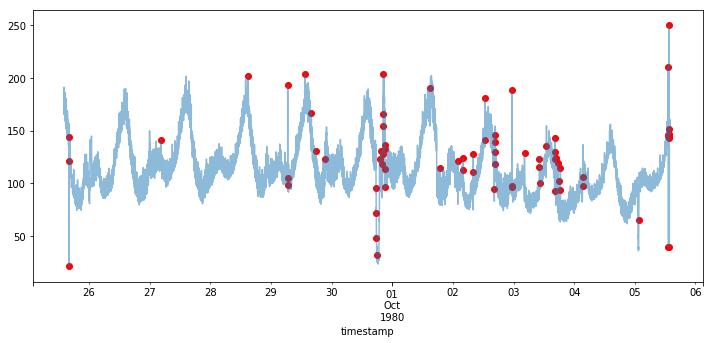

In [21]:
ax = df.plot(figsize=(12,5),alpha=0.5)
ax.scatter(df.iloc[outliers[:,0]].index, df.iloc[outliers[:,0]].values, c="r")

## Auto-encoders for Anomaly Detection

The ability for an auto-encode to compress and then decompress without loss of fidelity is a non-parametric way of making predictions. If our predictions are bad (ie. the loss is large) then we might call this an anomaly.  The following derives from the blogpost: https://towardsdatascience.com/machine-learning-for-anomaly-detection-and-condition-monitoring-d4614e7de770

Here we have vibration data recorded for a machine. The machine is run until it breaks. The task is to find out when the system goes out of normal operations, which will eventually lead to a break/failure.

<img src="https://cdn-images-1.medium.com/max/1600/1*7QfUsut5-OeSymRK_Z8mNg.jpeg">
<center><i>Normal operations over the first few days</i></center>

In [22]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# uncomment below to make the timeseries set merged_dataset_BearingTest_2.csv
"""
# To prep the data, download at http://data-acoustics.com/measurements/bearing-faults/bearing-4/
# then: 7za x IMS.7z 
# then:  unrar x 2nd_test.rar
data_dir = '/Users/jbloom/Downloads/2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
"""
merged_data = pd.read_csv("merged_dataset_BearingTest_2.csv", index_col=0, parse_dates=True)
print(merged_data.head())
print(merged_data.tail())

                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118
                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-19 05:42:39   0.453335   0.161016   0.137440   0.119047
2004-02-19 05:52:39   0.337583   0.132400   0.144992   0.092125
2004-02-19 06:02:39   0.351111   0.152266   0.151299   0.100817
2004-02-19 06:12:39   0.001857   0.003732   0.003656   0.001786
2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699


So the data spans about a week with vibrations measurements recorded every 10 minutes.  Let's make training data be the normal behavior and the testing data include the normal behavior as it transitions into abnormal.

Text(0.5, 1.0, 'The days leading up to the failure')

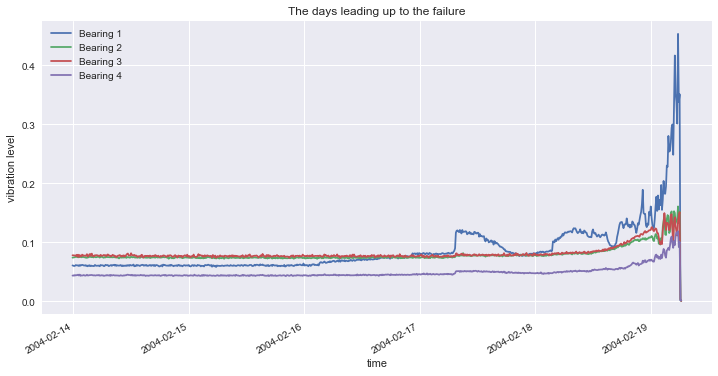

In [24]:
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]

dataset_test.plot(figsize = (12,6))
plt.xlabel("time")
plt.ylabel("vibration level")
plt.title("The days leading up to the failure")

Let's scale this using the `sklearn.MinMaxScaler`. See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [25]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [26]:
X_train.shape

(222, 4)

In [27]:
from numpy.random import seed

from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.models import model_from_json

Let's build an extremely simple autocoder -- four bearing measure inputs (ie. every timestamp). (We could do a more involved encoder where we chunk up time snippets.)

In [28]:
seed(10)
act_func = 'relu'

# Input layer:
model=Sequential()

# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.05),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [30]:
import tensorflow
earlystop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, 
                                             patience=10, \
                                             verbose=1, mode='auto')

history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1, callbacks=[earlystop])

Train on 210 samples, validate on 12 samples
Epoch 1/100
210/210 [==============================] - 0s 856us/sample - loss: 0.4846 - val_loss: 0.3822
Epoch 2/100
210/210 [==============================] - 0s 119us/sample - loss: 0.4037 - val_loss: 0.3148
Epoch 3/100
210/210 [==============================] - 0s 123us/sample - loss: 0.3300 - val_loss: 0.2592
Epoch 4/100
210/210 [==============================] - 0s 160us/sample - loss: 0.2649 - val_loss: 0.2197
Epoch 5/100
210/210 [==============================] - 0s 190us/sample - loss: 0.2176 - val_loss: 0.1963
Epoch 6/100
210/210 [==============================] - 0s 178us/sample - loss: 0.1883 - val_loss: 0.1767
Epoch 7/100
210/210 [==============================] - 0s 161us/sample - loss: 0.1683 - val_loss: 0.1601
Epoch 8/100
210/210 [==============================] - 0s 196us/sample - loss: 0.1525 - val_loss: 0.1462
Epoch 9/100
210/210 [==============================] - 0s 173us/sample - loss: 0.1393 - val_loss: 0.1332
Epoch 10/1

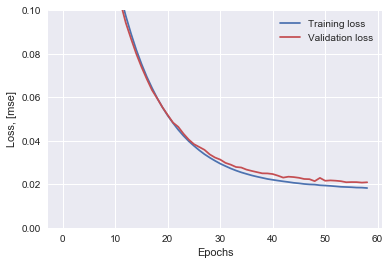

In [31]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/Users/jbloom/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0.0, 0.5)

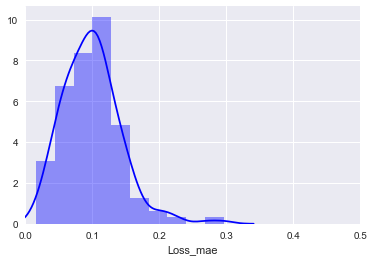

In [32]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

So it looks like normal behavior has a loss below 0.3.

In [33]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.3
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2004-02-13 23:52:39,0.134472,0.3,False
2004-02-14 00:02:39,0.087387,0.3,False
2004-02-14 00:12:39,0.044126,0.3,False
2004-02-14 00:22:39,0.093386,0.3,False
2004-02-14 00:32:39,0.127304,0.3,False


In [34]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train,  columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

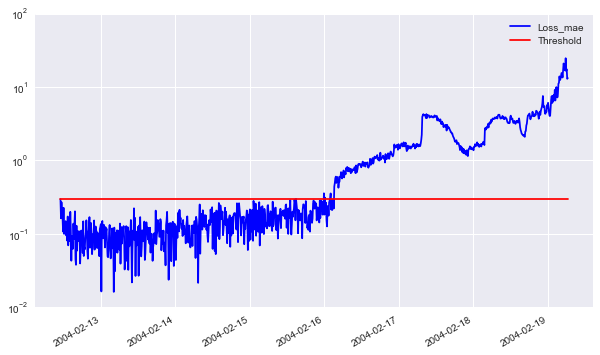

In [35]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])